In [82]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

In [123]:
# Adjust the function to eliminate margins by cropping the image as tight as possible around the number
def squashed_digit(number, squash_factor=0.3, font_size=100):
    """
    Display a number that is squashed in the y-direction and cropped to remove any margins using a custom TrueType font.

    Parameters:
    - number (int): The number to be displayed.
    - font_path (str): Path to the .ttf font file.
    - squash_factor (float): Factor to scale the number in the y-direction.
    - font_size (int): Font size for the number.
    """
    # Load the custom font
    fnt = ImageFont.truetype("Bartkey-8M0YA.otf", font_size)
    
    # Create an image for the text, initially with some padding
    img = Image.new('RGB', (font_size * 2, font_size * 2), 'white')
    d = ImageDraw.Draw(img)
    
    # Draw the text onto the image
    d.text((0, 0), str(number), font=fnt, fill='black')
    
    # Find the bounding box of the number
    padding = font_size/10
    bbox = d.textbbox((0, 0), str(number), font=fnt,spacing  = 0,align  = "center")
    bbox = (bbox[0],bbox[1]-padding,bbox[2],bbox[3]+padding)
    print(bbox)
    # Crop the image to the bounding box with some padding
    cropped_img = img.crop(bbox)
    
    # Squash the cropped image
    return cropped_img.resize((cropped_img.width, int(cropped_img.height * squash_factor)))

In [124]:
def stack_images_vertically(*images):
    # Check if there are any images passed
    if len(images) < 2:
        raise ValueError("Please provide at least two images to stack vertically.")

    # Ensure all images have the same width
    width = images[0].width
    for img in images[1:]:
        if img.width != width:
            raise ValueError("Images must have the same width to stack them vertically.")

    # Calculate the combined height
    total_height = sum(img.height for img in images)

    # Create a new image with the same width but combined height
    stacked_image = Image.new('RGB', (width, total_height))

    # Paste each image onto the stacked image
    y_offset = 0
    for img in images:
        stacked_image.paste(img, (0, y_offset))
        y_offset += img.height

    return stacked_image

In [125]:
def create_horizontal_bars(image,digit_height, bar_height_precent, offset):
    
    width = image.width
    height = image.height
    
    bar_height = digit_height*bar_height_precent
    
    separation = (digit_height-bar_height)*(1+offset)
    
    # Calculate the number of bars that can fit
    num_of_bars = int(height // (bar_height + separation))+1

    # Create a new image
    image = Image.new("RGB", (width, height), color="white")
    draw = ImageDraw.Draw(image)

    y = 0
    for i in range(num_of_bars):
        draw.rectangle([0, y, width, y + bar_height], fill="black")
        y += bar_height + separation

    return image

In [126]:
def combine(image1,image2):
    np_img1 = np.array(image1)
    np_img2 = np.array(image2)

    # Perform bitwise OR operation
    result_array = np.bitwise_and(np_img1, np_img2)

    # Create a new image from the resulting NumPy array
    return Image.fromarray(result_array, 'RGB')

In [127]:
def display_images_in_grid(image_list, columns=10, figsize=(50, 50)):
    rows = (len(image_list) + columns - 1) // columns

    fig, axes = plt.subplots(rows, columns, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        if i < len(image_list):
            ax.imshow(image_list[i])
            ax.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

In [149]:
squash_factor = .0025
f = squashed_digit(5, squash_factor=squash_factor, font_size=10000)
digit_height = f.height
f

(0, 730.0, 4350, 9630.0)


In [150]:
num = stack_images_vertically(*[f for _ in range(int(1/squash_factor)+1)])

results = []
offsets = np.linspace(.5,1,10)
bar_height_precents = np.linspace(.5,1,10)
print(offsets)
print(bar_heights)
for offset in offsets:
    for bar_height_precent in bar_height_precents:
        bars = create_horizontal_bars(num,digit_height,bar_height_precent,offset)

        res = combine(num,bars)
        results.append(res)

[0.5        0.55555556 0.61111111 0.66666667 0.72222222 0.77777778
 0.83333333 0.88888889 0.94444444 1.        ]
[17.25       17.88888889 18.52777778 19.16666667 19.80555556 20.44444444
 21.08333333 21.72222222 22.36111111 23.        ]


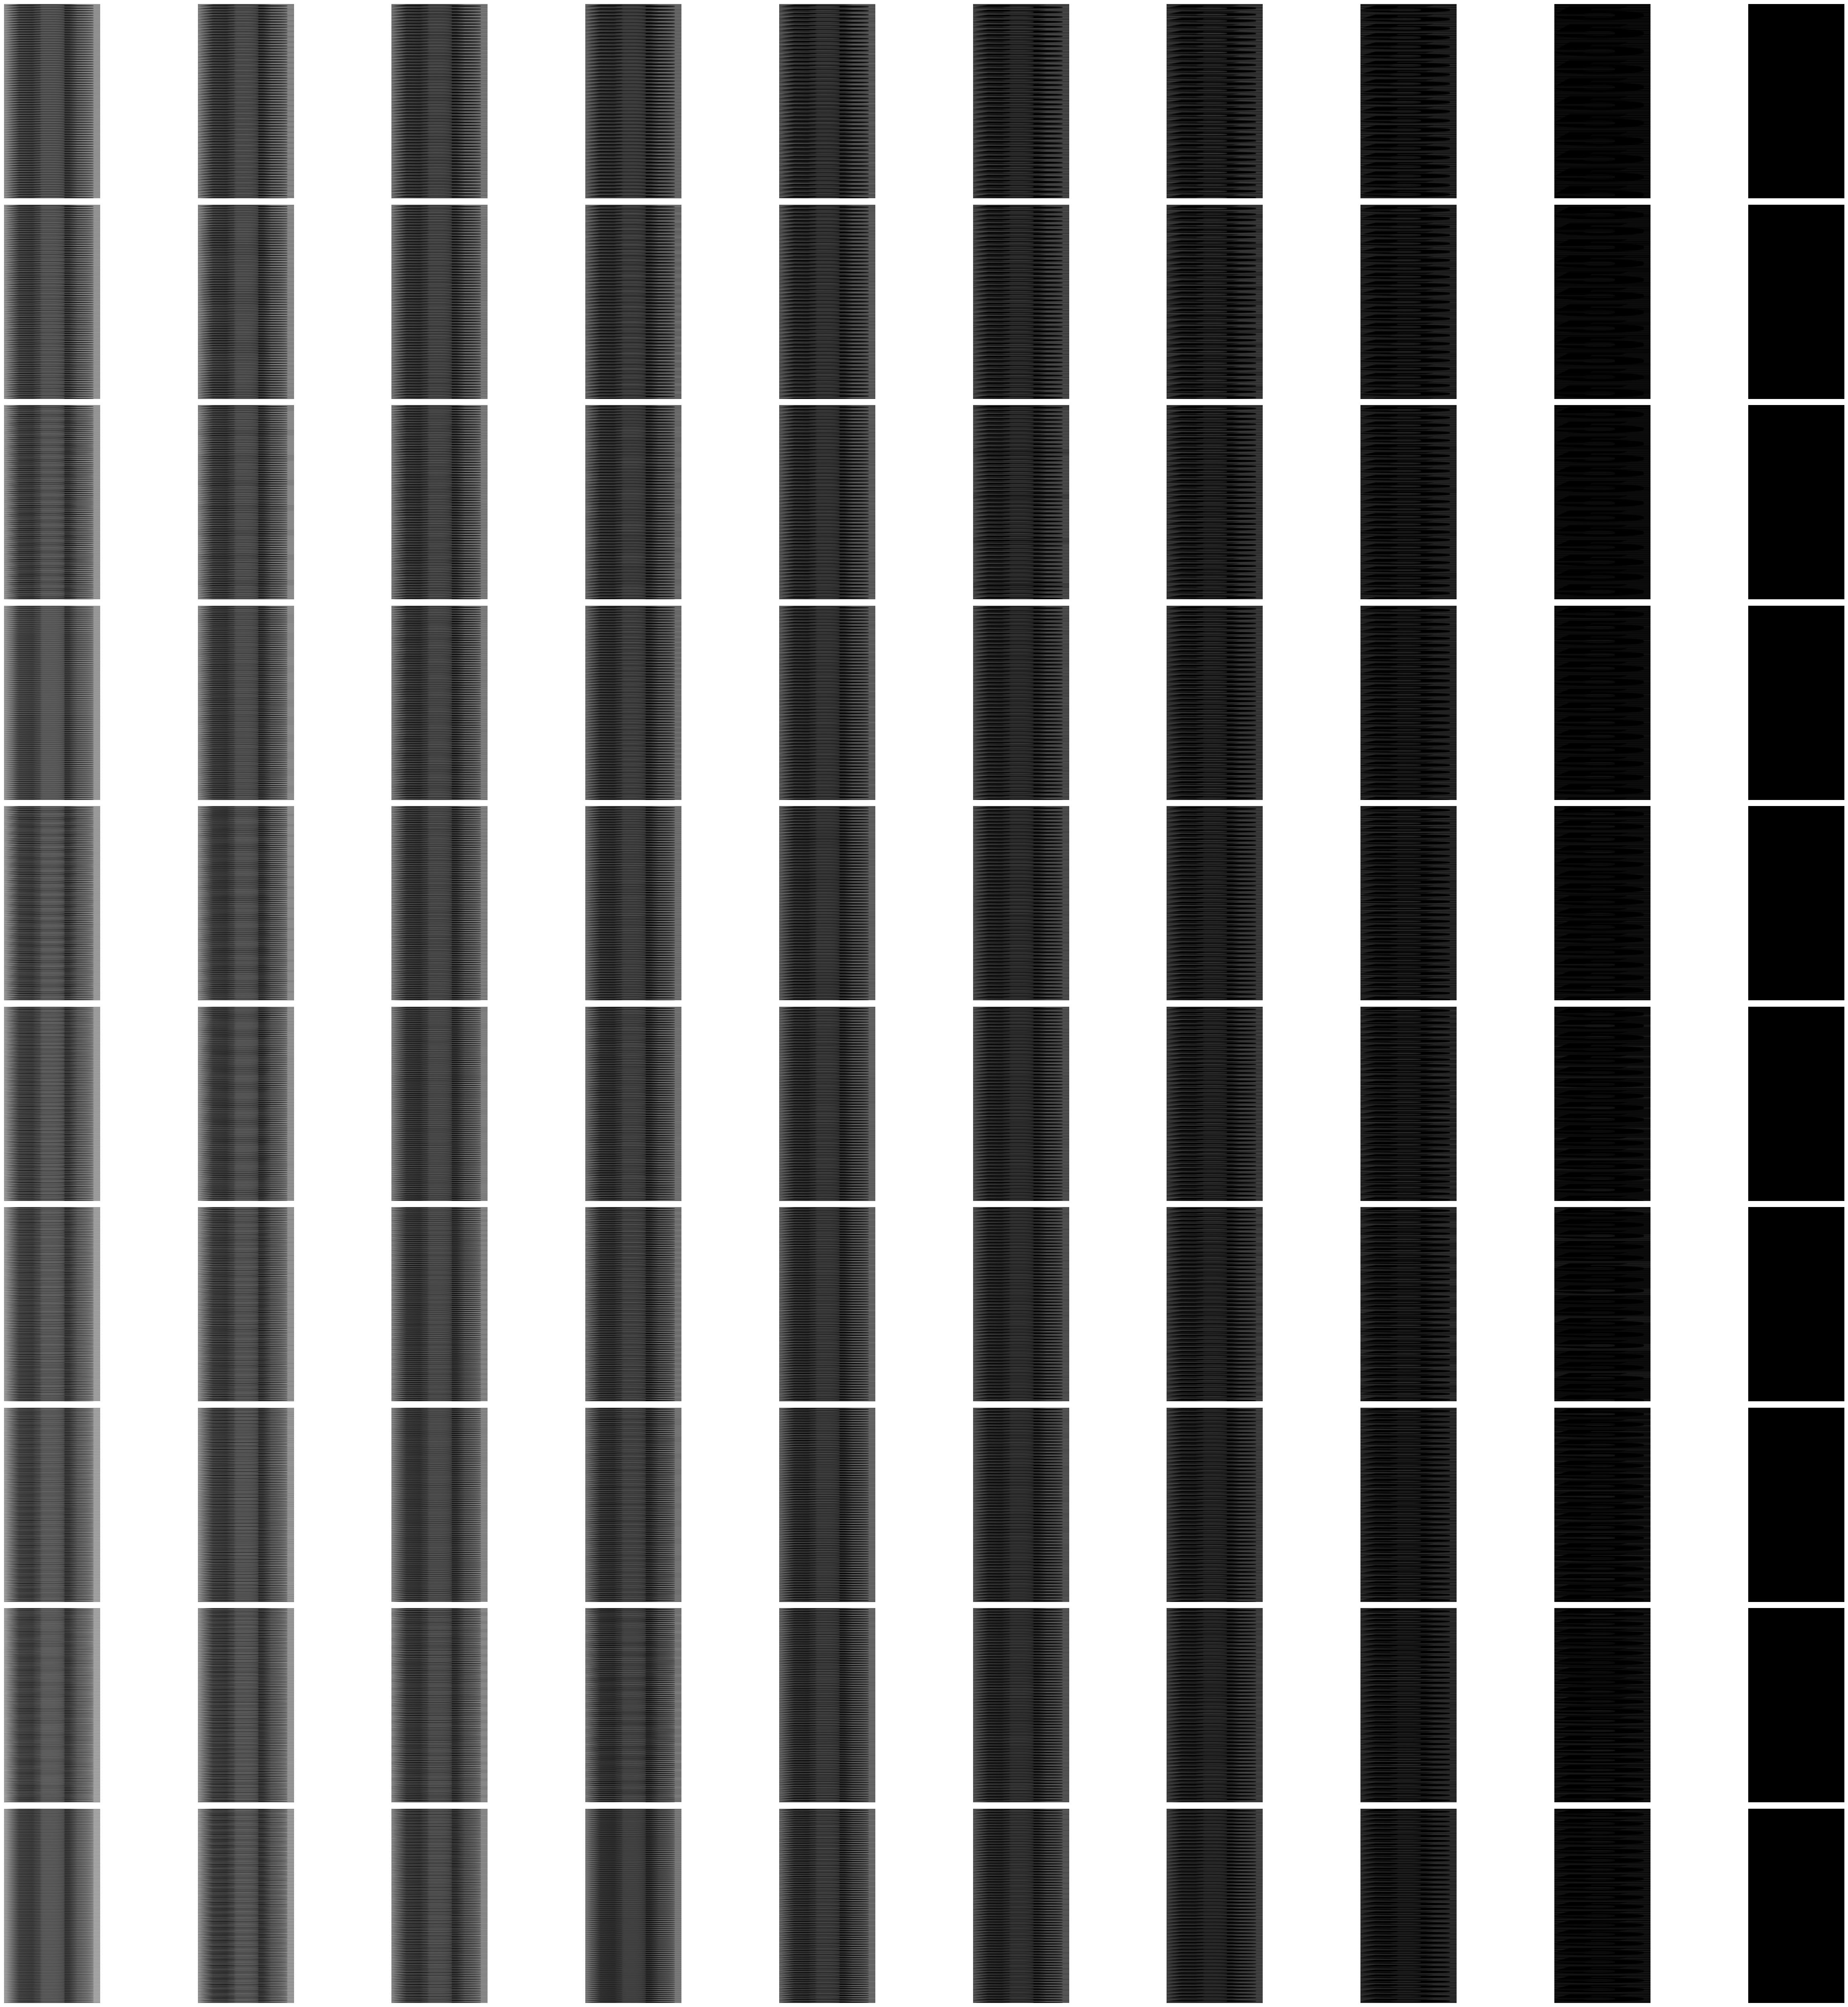

In [151]:
display_images_in_grid(results);

(0, 146.0, 870, 1926.0)


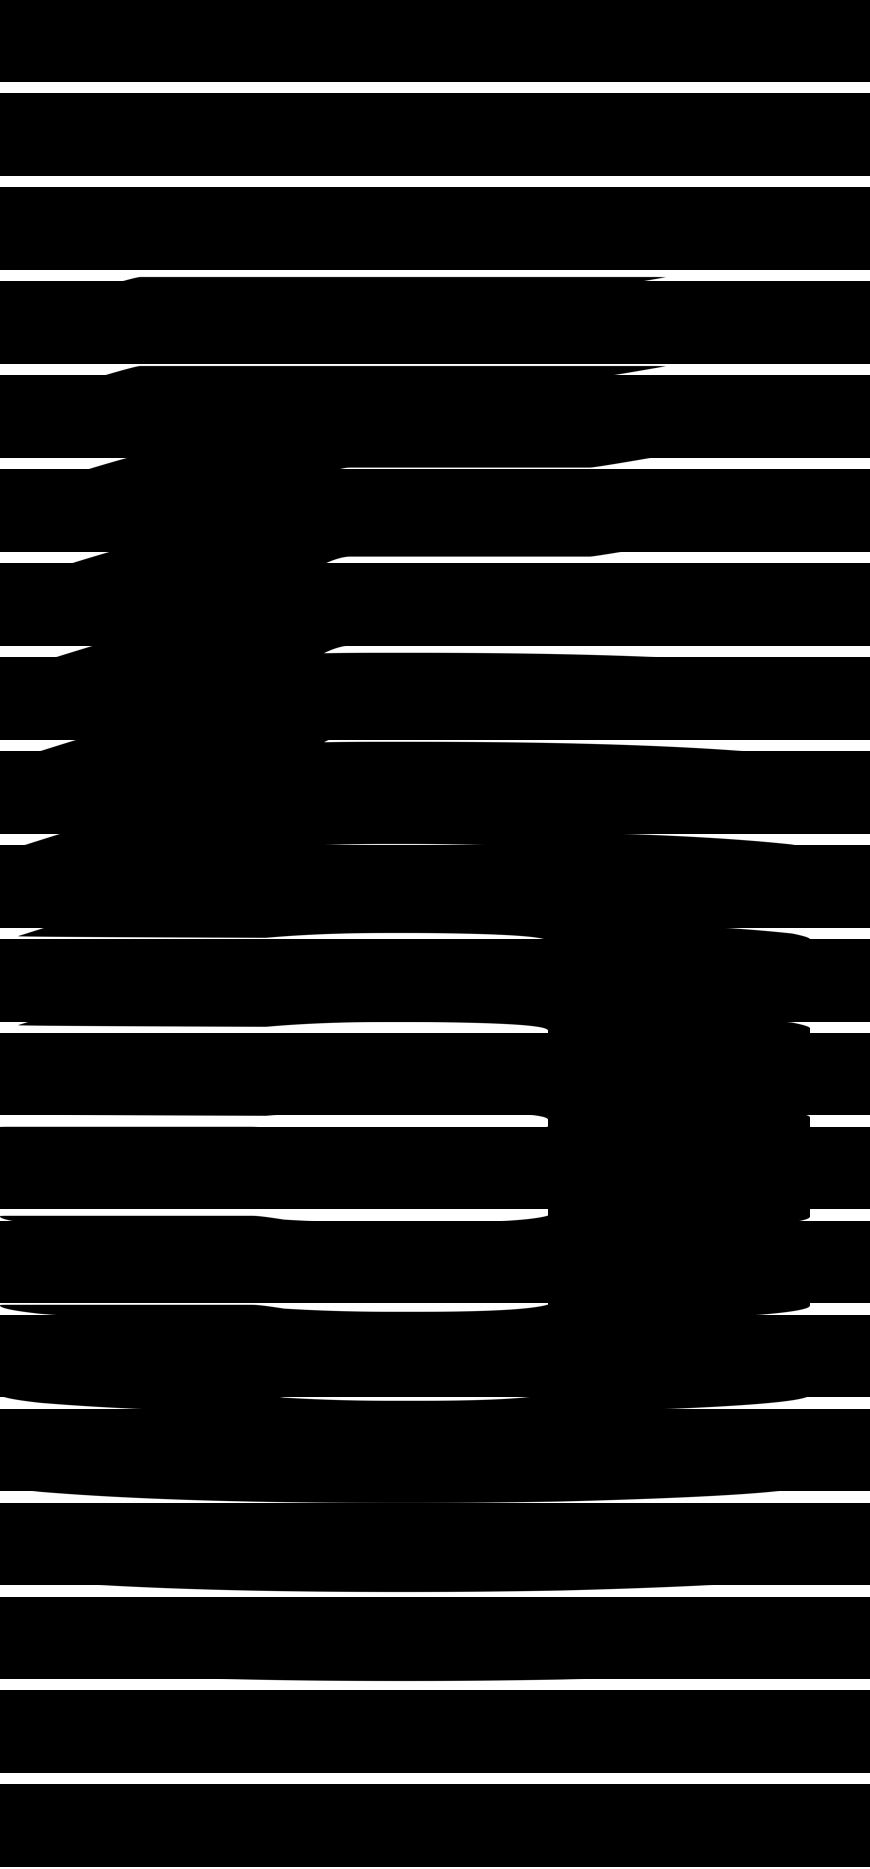

In [135]:
f = squashed_digit(5, squash_factor=squash_factor, font_size=2000)
digit_height = f.height
num = stack_images_vertically(*[f for _ in range(int(1/squash_factor)+1)])
offset = offsets[4]
bar_height = bar_height_precents[6];
bars = create_horizontal_bars(num,digit_height,bar_height,offset)
combine(num,bars)